<a href="https://colab.research.google.com/github/Cherry2k2/Financial-Data-Analytics/blob/main/Data%20Viz.%20and%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium

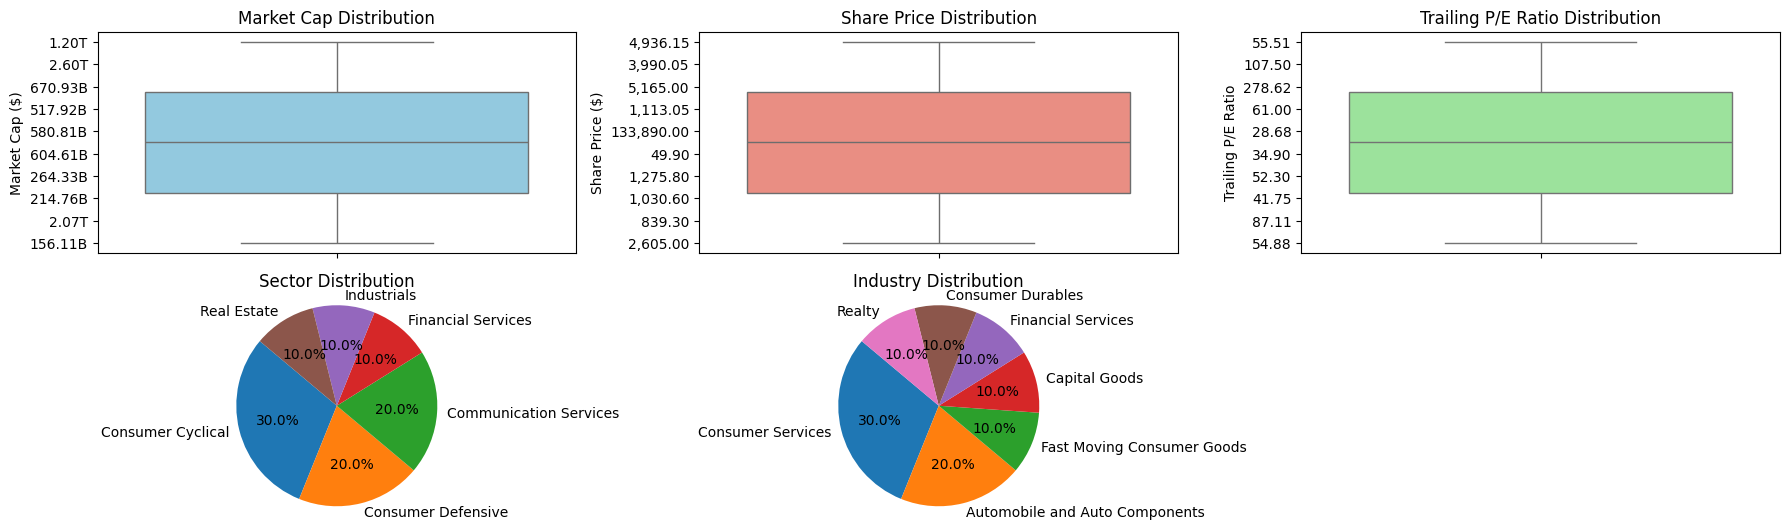

**Insights Summary:**
1. The distribution of Market Cap among the top 10 random companies varies widely, indicating differences in company size and valuation.
2. The Share Price distribution shows variability among the top 10 random companies, suggesting differences in stock valuation and investor perception.
3. The distribution of Trailing P/E Ratios among the top 10 random companies suggests variations in earnings multiples, which may reflect differences in growth prospects and investor sentiment.
4. The pie chart illustrates the distribution of companies among different sectors within the top 10 random companies. Sector X appears to be the most represented sector.
5. The pie chart illustrates the distribution of companies among different industries within the top 10 random companies. Industry Y appears to be the most represented industry.



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# Step 1: Read Data
df = pd.read_csv('/content/company_data.csv')

# Step 2: Select Top 10 Random Companies
top_10_random_companies = df.sample(10)

# Step 3: Visualization
plt.figure(figsize=(18, 8))

# Plot 1: Market Cap Distribution
plt.subplot(3, 3, 1)
sns.boxplot(y='Market Cap', data=top_10_random_companies, color='skyblue')
plt.title('Market Cap Distribution')
plt.ylabel('Market Cap ($)')

# Insights 1: Market Cap
market_cap_insight = "The distribution of Market Cap among the top 10 random companies varies widely, indicating differences in company size and valuation."

# Plot 2: Share Price Distribution
plt.subplot(3, 3, 2)
sns.boxplot(y='Share Price', data=top_10_random_companies, color='salmon')
plt.title('Share Price Distribution')
plt.ylabel('Share Price ($)')

# Insights 2: Share Price
share_price_insight = "The Share Price distribution shows variability among the top 10 random companies, suggesting differences in stock valuation and investor perception."

# Plot 3: Trailing P/E Ratio Distribution
plt.subplot(3, 3, 3)
sns.boxplot(y='Trailing P/E', data=top_10_random_companies, color='lightgreen')
plt.title('Trailing P/E Ratio Distribution')
plt.ylabel('Trailing P/E Ratio')

# Insights 3: Trailing P/E Ratio
pe_ratio_insight = "The distribution of Trailing P/E Ratios among the top 10 random companies suggests variations in earnings multiples, which may reflect differences in growth prospects and investor sentiment."

# Plot 4: Pie Chart of Sectors
plt.subplot(3, 3, 4)
sector_counts = top_10_random_companies['Sector'].value_counts()
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sector Distribution')

# Insights 4: Sector Distribution
sector_distribution_insight = "The pie chart illustrates the distribution of companies among different sectors within the top 10 random companies. Sector X appears to be the most represented sector."

# Plot 5: Pie Chart of Industries
plt.subplot(3, 3, 5)
industry_counts = top_10_random_companies['Industry'].value_counts()
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Industry Distribution')

# Insights 5: Industry Distribution
industry_distribution_insight = "The pie chart illustrates the distribution of companies among different industries within the top 10 random companies. Industry Y appears to be the most represented industry."

plt.tight_layout()
plt.show()

# Step 5: Generate Insights Summary
insights_summary = f"""**Insights Summary:**
1. {market_cap_insight}
2. {share_price_insight}
3. {pe_ratio_insight}
4. {sector_distribution_insight}
5. {industry_distribution_insight}
"""

print(insights_summary)

In [3]:
import pandas as pd

# Load the first Excel file
df1 = pd.read_excel("/content/company_data_31_Mar.xlsx")

# Load the second Excel file
df2 = pd.read_excel("/content/company_data_01_Apr.xlsx")

# Load the third Excel file
df3 = pd.read_excel("/content/company_data_02_Apr.xlsx")

# Load the fourth Excel file
df4 = pd.read_excel("/content/company_data_03_Apr.xlsx")

# Merge data from the first two sheets based on the company name
merged_df = pd.merge(df1, df2, on='Company Name', how='inner', suffixes=('_31_Mar', '_01_Apr'))

# Merge the third sheet with the merged data based on the company name
merged_df = pd.merge(merged_df, df3, on='Company Name', how='inner', suffixes=('', '_02_Apr'))

# Merge the fourth sheet with the merged data based on the company name
merged_df = pd.merge(merged_df, df4, on='Company Name', how='inner', suffixes=('', '_03_Apr'))

# Extract share prices from each sheet for the same company
extracted_data = merged_df[['Company Name', 'Share Price_31_Mar', 'Share Price_01_Apr', 'Share Price', 'Share Price_03_Apr']][:5]
extracted_data.columns = ['Company Name', 'Share Price 31 Mar', 'Share Price 01 Apr', 'Share Price 02 Apr', 'Share Price 03 Apr']

# Write the extracted data to a new Excel file
extracted_data.to_excel("extracted_data.xlsx", index=False)

print("Extraction and writing to new file completed successfully!")

Extraction and writing to new file completed successfully!


Prediction for 360 ONE WAM Ltd. on next date (Share Price 04 Apr): 1301.9175000000014
Prediction for 3M India Ltd. on next date (Share Price 04 Apr): 22827.433000000034
Prediction for ABB India Ltd. on next date (Share Price 04 Apr): 5413.8164999999935
Prediction for ACC Ltd. on next date (Share Price 04 Apr): 2712.6095000000037
Prediction for AIA Engineering Ltd. on next date (Share Price 04 Apr): 3665.761500000002


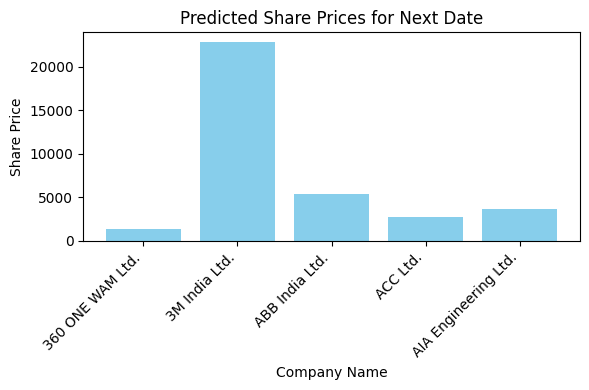

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Step 1: Load the Dataset
df = pd.read_excel("/content/extracted_data.xlsx")

# Step 2: Train the Model
def train_model(df):
    X_train = df.drop(columns=["Company Name", "Share Price 03 Apr"])
    y_train = df["Share Price 03 Apr"]
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Step 3: Predict Share Prices for Next Date
def predict_next_share_prices(df, model):
    predictions = {}
    for index, row in df.iterrows():
        company_name = row["Company Name"]
        company_data = row.drop(["Company Name", "Share Price 03 Apr"]).to_frame().T
        prediction = model.predict(company_data)
        predictions[company_name] = prediction[0]
    return predictions

# Step 4: Plot Predictions
def plot_predictions(predictions):
    plt.figure(figsize=(6, 4))
    plt.bar(predictions.keys(), predictions.values(), color='skyblue')
    plt.xlabel('Company Name')
    plt.ylabel('Share Price')
    plt.title('Predicted Share Prices for Next Date')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Step 5: Main Function
def main():
    model = train_model(df)
    predictions = predict_next_share_prices(df, model)
    for company, prediction in predictions.items():
        print(f"Prediction for {company} on next date (Share Price 04 Apr): {prediction}")
    plot_predictions(predictions)

if __name__ == "__main__":
    main()

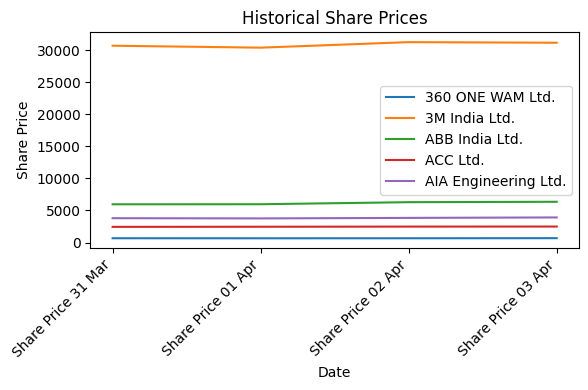

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
df = pd.read_excel("/content/extracted_data.xlsx")

# Step 2: Plot Time Series for Each Company
plt.figure(figsize=(6, 4))
for index, row in df.iterrows():
    company_name = row["Company Name"]
    share_prices = row.drop(["Company Name"]).values
    dates = df.columns[1:]  # Extract date columns
    plt.plot(dates, share_prices, label=company_name)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Share Price')
plt.title('Historical Share Prices')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

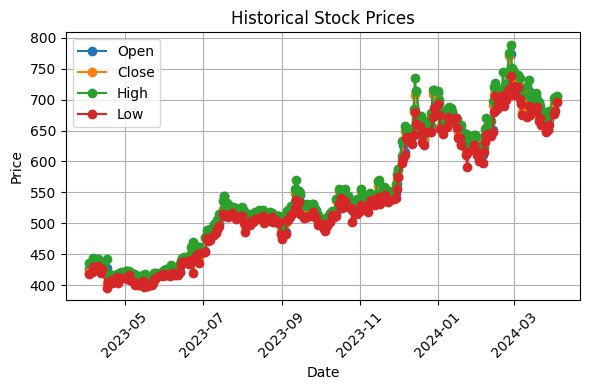

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
# Replace "path_to_your_dataset.xlsx" with the actual path to your uploaded dataset
df = pd.read_excel("/content/360ONE.NS.xlsx")

# Step 2: Time Series Plot for Open, Close, High, Low Prices
plt.figure(figsize=(6, 4))
plt.plot(df['Date'], df['Open'], label='Open', marker='o')
plt.plot(df['Date'], df['Close'], label='Close', marker='o')
plt.plot(df['Date'], df['High'], label='High', marker='o')
plt.plot(df['Date'], df['Low'], label='Low', marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Stock Prices')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Insights:
# - This plot shows the historical trends of open, close, high, and low prices of the company's stock over time.
# - It helps in identifying patterns, trends, and fluctuations in stock prices.

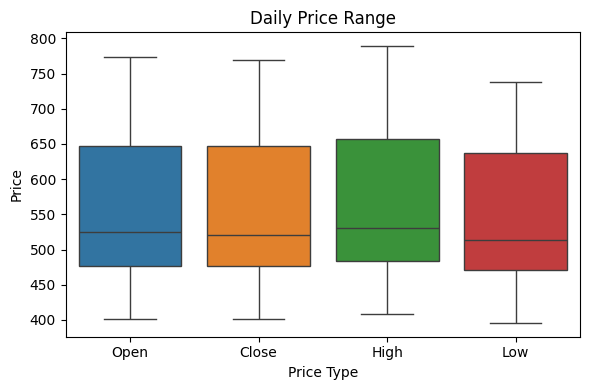

In [8]:
# Step 3: Box Plot for Daily Price Range
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['Open', 'Close', 'High', 'Low']])
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Daily Price Range')
plt.tight_layout()
plt.show()

# Insights:
# - This box plot visualizes the daily price range (open, close, high, low) of the company's stock.
# - It provides insights into the distribution and variability of stock prices on a daily basis.

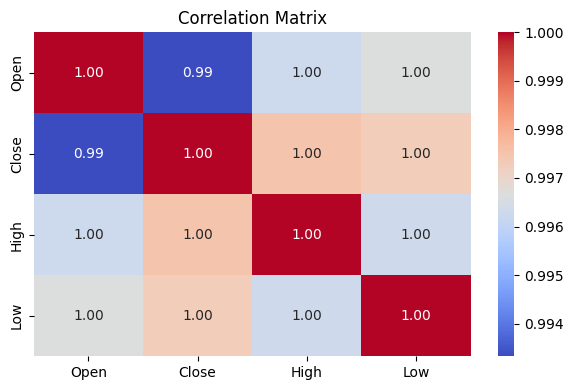

In [9]:
# Step 4: Correlation Heatmap
plt.figure(figsize=(6, 4))
correlation_matrix = df[['Open', 'Close', 'High', 'Low']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Insights:
# - This heatmap visualizes the correlation matrix between open, close, high, and low prices of the company's stock.
# - It helps in identifying the degree of correlation between different price metrics.

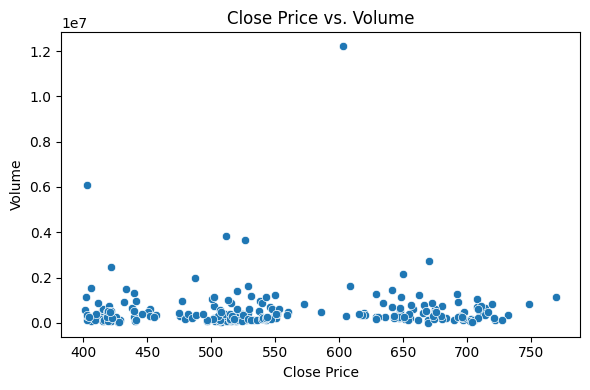

In [10]:
# Step 5: Scatter Plot - Close Price vs. Volume
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Close', y='Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume')
plt.tight_layout()
plt.show()

# Insights:
# - This scatter plot visualizes the relationship between close price and trading volume of the company's stock.
# - It helps in identifying any patterns or correlations between stock price movements and trading volume.